In [45]:
import sklearn.ensemble
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
boston = load_boston()

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

Information about dataset: we are trying to predict price of a house.
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [25]:
print(boston.data.shape)

(506, 13)


So we have 13 features and ~500 observations.

In [36]:
x = pd.DataFrame(boston.data) # target variable aside of features
price = pd.DataFrame(boston.target) # target - price of the house
x.columns = boston.feature_names
price.columns = ['TARGET']
print(x.columns)
print(price.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
Index(['TARGET'], dtype='object')


In [37]:
print(x.head())
print(price.head()) # first obs.

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   TARGET
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2


### Another approach: Gradient Boosting via sklearn.ensemble.GradientBoostingRegressor

About library: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

Example of usage: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
# as GradientBoosting is robust, big number of n_estimators doesn't lead to overfitting (so setting 1000 instead of 100 by default)

model = GradientBoostingRegressor(**parameters) # start with parameters selected
model.fit(x, price)

C:\Users\novle\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
feature_list = list(x.columns)

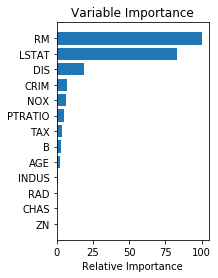

In [46]:
# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

So this method finds features RM, LSTAT, and DIS quite important. (These are average number of rooms per dwelling, percent of lower status of the population, and weighted distances to five Boston employment centres)

In [50]:
import lime
import lime.lime_tabular

In [53]:
categorical_features = np.argwhere(np.array([len(set(boston.data[:,x])) for x in range(boston.data.shape[1])]) <= 10).flatten()

explainer = lime.lime_tabular.LimeTabularExplainer(x, feature_names=boston.feature_names, class_names=['price'], categorical_features=categorical_features, verbose=True, mode='regression')

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [6]:
for i in range (0,17):
    print(8**i % 97)

1
8
64
27
22
79
50
12
96
89
33
70
75
18
47
85
1
